This visualization demo is an attempt to mimic a visualization on Jon Stewart's guests on The Daily Show. https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/

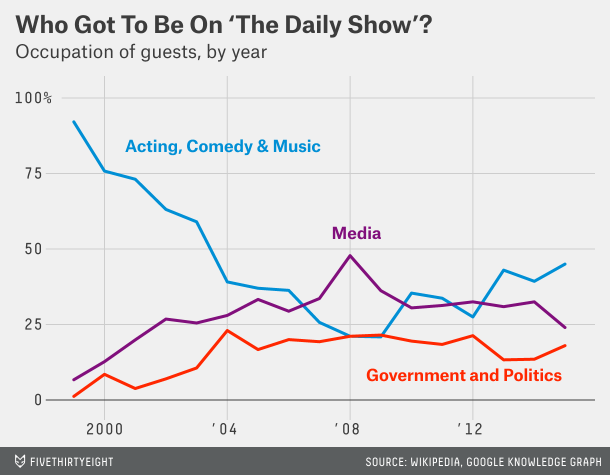

In [1]:
from IPython.display import Image
Image("hickey-datalab-dailyshow.png")

## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np

## Load Data

In [3]:
guests = pd.read_csv('daily_show_guests.csv')

In [4]:
guests

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier
...,...,...,...,...,...
2688,2015,biographer,7/29/15,Media,Doris Kearns Goodwin
2689,2015,director,7/30/15,Media,J. J. Abrams
2690,2015,stand-up comedian,8/3/15,Comedy,Amy Schumer
2691,2015,actor,8/4/15,Acting,Denis Leary


## Data Wrangling

In [5]:
grouped2 = guests.groupby(['YEAR','Group'])
grouped2 = grouped2.count().reset_index().drop(columns=['GoogleKnowlege_Occupation','Raw_Guest_List']).rename(columns={'Show':'count','YEAR':'year','Group':'group'})
grouped2

,year,group,count
0,1999,Acting,108
1,1999,Comedy,25
2,1999,Media,11
3,1999,Musician,17
4,1999,Politician,2
...,...,...,...
219,2015,Misc,3
220,2015,Musician,5
221,2015,Political Aide,3
222,2015,Politician,14


In [6]:
conditions = [
    (grouped2['group'] == 'Acting'),
    (grouped2['group'] == 'Comedy'),
    (grouped2['group'] == 'Musician'),
    (grouped2['group'] == 'Media'),
    (grouped2['group'] == 'Government'),
    (grouped2['group'] == 'Politician')
]

values = [1,1,1,2,3,3]

grouped2['gid'] = np.select(conditions,values)

In [7]:
grouped2

,year,group,count,gid
0,1999,Acting,108,1
1,1999,Comedy,25,1
2,1999,Media,11,2
3,1999,Musician,17,1
4,1999,Politician,2,3
...,...,...,...,...
219,2015,Misc,3,0
220,2015,Musician,5,1
221,2015,Political Aide,3,0
222,2015,Politician,14,3


In [8]:
grouped2 = grouped2.groupby(['year','gid']).agg({'count':'sum'}).reset_index()
grouped2

,year,gid,count
0,1999,1,150
1,1999,2,11
2,1999,3,2
3,2000,0,6
4,2000,1,125
...,...,...,...
62,2014,3,19
63,2015,0,17
64,2015,1,45
65,2015,2,24


In [9]:
t = grouped2.groupby('year').agg({'count':'sum'}).reset_index()
t

,year,count
0,1999,163
1,2000,165
2,2001,156
3,2002,157
4,2003,159
5,2004,161
6,2005,162
7,2006,160
8,2007,140
9,2008,161


In [10]:
grouped3 = grouped2.merge(t, on='year').rename(columns={'count_x':'countid','count_y':'sum'})
grouped3

,year,gid,countid,sum
0,1999,1,150,163
1,1999,2,11,163
2,1999,3,2,163
3,2000,0,6,165
4,2000,1,125,165
...,...,...,...,...
62,2014,3,19,163
63,2015,0,17,100
64,2015,1,45,100
65,2015,2,24,100


In [11]:
grouped4 = grouped3.groupby('year').apply(lambda x: 100*x/x.sum())
grouped4['year'] = grouped3['year']
grouped4['gid'] = grouped3['gid']
grouped4 = grouped4.drop(columns=['sum']).rename(columns={'countid':'prop'})
grouped4

,year,gid,prop
0,1999,1,92.024540
1,1999,2,6.748466
2,1999,3,1.226994
3,2000,0,3.636364
4,2000,1,75.757576
...,...,...,...
62,2014,3,11.656442
63,2015,0,17.000000
64,2015,1,45.000000
65,2015,2,24.000000


In [12]:
conditions = [
    (grouped4['gid'] == 0),
    (grouped4['gid'] == 1),
    (grouped4['gid'] == 2),
    (grouped4['gid'] == 3)
]

values = ["Other","Acting, Comedy & Music","Media","Government and Politics"]

grouped4['gid_str'] = np.select(conditions,values)

In [13]:
grouped4 = grouped4[grouped4['gid'] != 0]
grouped4

,year,gid,prop,gid_str
0,1999,1,92.024540,"Acting, Comedy & Music"
1,1999,2,6.748466,Media
2,1999,3,1.226994,Government and Politics
4,2000,1,75.757576,"Acting, Comedy & Music"
5,2000,2,12.727273,Media
6,2000,3,7.878788,Government and Politics
8,2001,1,73.076923,"Acting, Comedy & Music"
9,2001,2,19.230769,Media
10,2001,3,3.205128,Government and Politics
12,2002,1,63.057325,"Acting, Comedy & Music"


## Data Gathering and Plotting

In [14]:
sns.set_context("talk")

C:\Users\aKost\AppData\Local\Temp/ipykernel_12840/394409180.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(['\'{:g}'.format(x%100) for x in fig.get_xticks()])


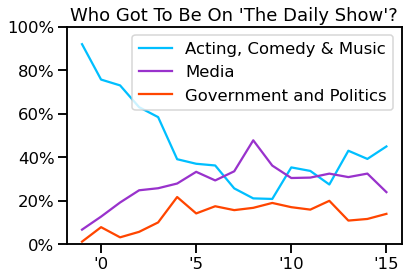

In [16]:
fig = sns.lineplot(data=grouped4, x="year", y="prop", hue="gid_str", palette = ['deepskyblue','darkorchid','orangered'])
fig.set(xlabel=None,ylabel=None,title="Who Got To Be On 'The Daily Show'?")
fig.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.set_xticklabels(['\'{:g}'.format(x%100) for x in fig.get_xticks()])
fig.set_ylim(0,100)
fig.legend(title=None)